In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import keras
from keras.models import Sequential
from keras import layers
from keras import models
from keras.layers import Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras.applications import VGG16
import os
import cv2, glob
import numpy as np
from tensorflow.keras.preprocessing import image
import shutil
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten 
from keras.layers import Dense 
from keras.models import load_model
from keras.applications.vgg16 import VGG16
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet import MobileNet

In [3]:
!mkdir MyDrive

mkdir: cannot create directory ‘MyDrive’: File exists


In [4]:
!mount --bind /content/drive/My\ Drive /content/MyDrive

In [5]:
os.chdir("/content/MyDrive/AI_VAR/LAB4")

In [6]:
def prepareDatabase(original_directory, base_directory):

    #If the folder already exist remove everything
    if os.path.exists(base_directory):
        shutil.rmtree(base_directory)

    #Recreate the basefolder
    os.mkdir(base_directory)

    #TODO - Application 1 - Step 1 - Struncture the dataset in training, validation and testing directories
    
    #struncture the dataset in training, validation and testing directories 
    train_directory = os.path.join(base_directory, 'train') 
    os.mkdir(train_directory) 
    validation_directory = os.path.join(base_directory, 'validation') 
    os.mkdir(validation_directory) 
    test_directory = os.path.join(base_directory, 'test') 
    os.mkdir(test_directory) 

    #TODO - Application 1 - Step 1 - Create the cat/dog training directories - See figure 4

    #create the cat/dog training directories 
    train_cats_directory = os.path.join(train_directory, 'cats') 
    os.mkdir(train_cats_directory) 
    train_dogs_directory = os.path.join(train_directory, 'dogs') 
    os.mkdir(train_dogs_directory) 
    
    #TODO - Application 1 - Step 1 - Create the cat/dog validation directories - See figure 4
    #create the cat/dog validation directories 
    validation_cats_directory = os.path.join(validation_directory, 'cats') 
    os.mkdir(validation_cats_directory) 
    validation_dogs_directory = os.path.join(validation_directory, 'dogs') 
    os.mkdir(validation_dogs_directory) 

    #TODO - Application 1 - Step 1 - Create the cat/dog testing directories - See figure 4
    #create the cat/dog testing directories 
    test_cats_directory = os.path.join(test_directory, 'cats') 
    os.mkdir(test_cats_directory) 
    test_dogs_directory = os.path.join(test_directory, 'dogs') 
    os.mkdir(test_dogs_directory)


    #TODO - Application 1 - Step 1 - Copy the first 1000 cat images in to the training directory (train_cats_directory)
    original_directory_cat = str(original_directory + '/cats/') 
    fnames = ['{}.jpg'.format(i) for i in range(1000)] 
    for fname in fnames: 
        src = os.path.join(original_directory_cat, fname) 
        dst = os.path.join(train_cats_directory, fname) 
        shutil.copyfile(src, dst)

    #TODO - Application 1 - Exercise 1 - Copy the next 500 cat images in to the validation directory (validation_cats_directory)
    fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)] 
    for fname in fnames: 
        src = os.path.join(original_directory_cat, fname) 
        dst = os.path.join(validation_cats_directory, fname) 
        shutil.copyfile(src, dst)

    #TODO - Application 1 - Exercise 1 - Copy the next 500 cat images in to the test directory (test_cats_directory)
    fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)] 
    for fname in fnames: 
        src = os.path.join(original_directory_cat, fname) 
        dst = os.path.join(test_cats_directory, fname) 
        shutil.copyfile(src, dst)

    #TODO - Application 1 - Exercise 2 - Copy the first 1000 dogs images in to the training directory (train_dogs_directory)
    original_directory_dog = str(original_directory + '/dogs/') 
    fnames = ['{}.jpg'.format(i) for i in range(1000)] 
    for fname in fnames: 
        src = os.path.join(original_directory_dog, fname) 
        dst = os.path.join(train_dogs_directory, fname) 
        shutil.copyfile(src, dst)

    #TODO - Application 1 - Exercise 2 - Copy the next 500 dogs images in to the validation directory (validation_dogs_directory)
    fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)] 
    for fname in fnames: 
        src = os.path.join(original_directory_dog, fname) 
        dst = os.path.join(validation_dogs_directory, fname) 
        shutil.copyfile(src, dst)

    #TODO - Application 1 - Exercise 2 - Copy the next 500 dogs images in to the test directory (test_dogs_directory)
    fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)] 
    for fname in fnames: 
        src = os.path.join(original_directory_dog, fname) 
        dst = os.path.join(test_dogs_directory, fname) 
        shutil.copyfile(src, dst)

    #TODO - Application 1 - Step 1 - As a sanitary check verify how many pictures are in each directory
    #As a sanitary check verify how many pictures are in each directory 
    print('Total number of CATS used for training = {}'.format(len(os.listdir(train_cats_directory)))) 
    print('Total number of CATS used for validation = {}'.format(len(os.listdir(validation_cats_directory)))) 
    print('Total number of CATS used for testing = {}'.format(len(os.listdir(test_cats_directory)))) 
    
    print('Total number of DOGS used for training = {}'.format(len(os.listdir(train_dogs_directory)))) 
    print('Total number of DOGS used for validation = {}'.format(len(os.listdir(validation_dogs_directory)))) 
    print('Total number of DOGS used for testing = {}'.format(len(os.listdir(test_dogs_directory)))) 

    return

In [7]:
original_directory = "/content/MyDrive/AI_VAR/LAB4/CatsDogs_Classification_ForStudents/Kaggle_Cats_And_Dogs_Dataset/"
base_directory = "/content/MyDrive/AI_VAR/LAB4/CatsDogs_Classification_ForStudents/Kaggle_Cats_And_Dogs_Dataset/Kaggle_Cats_And_Dogs_Dataset_Small/"

In [8]:
# prepareDatabase(original_directory, base_directory)

In [9]:
def imagePreprocessing(base_directory):

    train_directory = base_directory + '/train'
    validation_directory = base_directory + '/validation'
    test_directory = base_directory + '/test'

    #TODO - Application 1 - Step 2 - Create the image data generators for train and validation
    train_datagen = ImageDataGenerator( 
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest')

    #train_datagen = ImageDataGenerator(rescale=1./255) 
    validation_datagen = ImageDataGenerator(rescale=1./255) 

    # Create the image data generator for the test
    test_datagen = ImageDataGenerator(rescale=1./255) 
    test_generator = test_datagen.flow_from_directory(test_directory, target_size = (150, 150), batch_size = 20, class_mode='binary') 
 
    train_generator = train_datagen.flow_from_directory(train_directory, target_size = (150, 150), batch_size = 20, class_mode='binary') 
    validation_generator = validation_datagen.flow_from_directory(validation_directory,target_size = (150,150), batch_size = 20, class_mode='binary') 

    #TODO - Application 1 - Step 2 - Analize the output of the train and validation generators
    for data_batch, labels_batch in train_generator: 
        print('Data batch shape in train: ', data_batch.shape) 
        print('Labels batch shape in train: ', labels_batch.shape) 
        break 
 
    for data_batch, labels_batch in validation_generator: 
        print('Data batch shape in validation: ', data_batch.shape) 
        print('Labels batch shape in validation: ', labels_batch.shape) 
        break 

    return train_generator, validation_generator, test_generator

In [10]:
def defineCNNModelFromScratch():

    #Application 1 - Step 3 - Initialize the sequential model
    model = models.Sequential()

    #TODO - Application 1 - Step 3 - Create the first hidden layer as a convolutional layer
    model.add(keras.Input(shape=(150, 150, 3)))   
    model.add(keras.layers.Conv2D(32, (3, 3), activation="relu"))

    #TODO - Application 1 - Step 3 - Define a pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #TODO - Application 1 - Step 3 - Create the third hidden layer as a convolutional layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))

    #TODO - Application 1 - Step 3 - Define a pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #TODO - Application 1 - Step 3 - Create another convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))

    #TODO - Application 1 - Step 3 - Define a pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #TODO - Application 1 - Step 3 - Create another convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))

    #TODO - Application 1 - Step 3 - Define a pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #TODO - Application 1 - Step 3 - Define the flatten layer
    model.add(Flatten())

    # Add drop out
    model.add(Dropout(0.5))

    #TODO - Application 1 - Step 3 - Define a dense layer of size 512
    model.add(Dense(units = 512, activation = "relu"))

    #TODO - Application 1 - Step 3 - Define the output layer
    model.add(Dense(1, activation='sigmoid'))

    #TODO - Application 1 - Step 3 - Visualize the network arhitecture (list of layers)
    model.summary()

    #TODO - Application 1 - Step 3 - Compile the model
    model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [26]:
def defineCNNModelVGGPretrained():

    #TODO - Exercise 6 - Load the pretrained VGG16 network in a variable called baseModel
    #The top layers will be omitted; The input_shape will be kept to (150, 150, 3)
    #baseModel = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    #baseModel = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    #baseModel = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    #baseModel = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    baseModel = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

    #TODO - Exercise 6 - Visualize the network arhitecture (list of layers)
    baseModel.summary()

    #TODO - Exercise 6 - Freeze the baseModel layers to not to allow training
    for layer in baseModel.layers:
      layer.trainable = False 

    # baseModel.trainable = True

    # set_trainable = False

    # for layer in baseModel.layers:
    #   if layer.name == 'block5_conv1':
    #     set_trainable = True

    #   if set_trainable:
    #     layer.trainable = True
      
    #   else:
    #     layer.trainable = False    

    #Create the final model and add the layers from the baseModel
    VGG_model = models.Sequential()
    VGG_model.add(baseModel)

    # TODO - Exercise 6 - Add the flatten layer
    VGG_model.add(Flatten())

    # TODO - Exercise 6 - Add the dropout layer
    VGG_model.add(Dropout(0.5))

    # TODO - Exercise 6 - Add a dense layer of size 512
    VGG_model.add(Dense(units = 512, activation = "relu"))

    # TODO - Exercise 6 - Add the output layer
    VGG_model.add(Dense(1, activation='sigmoid'))

    # TODO - Exercise 6 - Compile the model
    VGG_model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return VGG_model

In [27]:
def visualizeTheTrainingPerformances(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)
    pyplot.title('Training and validation accuracy')
    pyplot.plot(epochs, acc, 'bo', label = 'Training accuracy')
    pyplot.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
    pyplot.legend()

    pyplot.figure()
    pyplot.title('Training and validation loss')
    pyplot.plot(epochs, loss, 'bo', label = 'Training loss')
    pyplot.plot(epochs, val_loss, 'b', label = 'Validation loss')
    pyplot.legend

    pyplot.show()

    return

In [28]:
def main():

    # original_directory = "./Kaggle_Cats_And_Dogs_Dataset"
    # base_directory = "./Kaggle_Cats_And_Dogs_Dataset_Small"

    #TODO - Application 1 - Step 1 - Load the Fashion MNIST dataset in Keras
    #prepareDatabase(original_directory, base_directory)

    #TODO - Application 1 - Step 2 - Call the imagePreprocessing method
    train_generator, validation_generator, test_generator = imagePreprocessing(base_directory)

    #TODO - Application 1 - Step 3 - Call the method that creates the CNN model
    #model = defineCNNModelFromScratch()

    model = defineCNNModelVGGPretrained()

    #TODO - Application 1 - Step 4 - Train the model
    history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=50, validation_data=validation_generator, validation_steps=50) 

    # Evaluate the model on the test set
    scores = model.evaluate_generator(test_generator,500) #500 testing images
    print("Loss: ", scores[0], "Accuracy: ", scores[1])
    model.save('Model_cats_dogs_small_dataset.h5')

    #TODO - Application 1 - Step 5 - Visualize the system performance using the diagnostic curves
    visualizeTheTrainingPerformances(history) 

    return


Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Data batch shape in train:  (20, 150, 150, 3)
Labels batch shape in train:  (20,)
Data batch shape in validation:  (20, 150, 150, 3)
Labels batch shape in validation:  (20,)
17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_____________

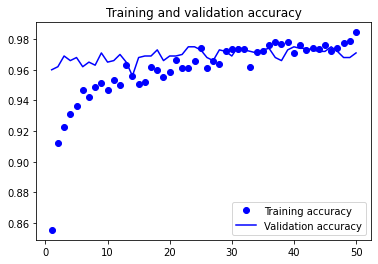

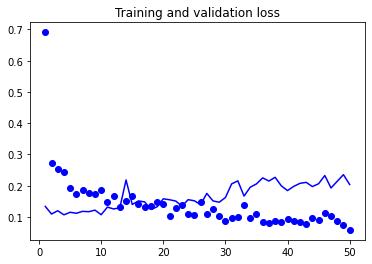

In [29]:
if __name__ == '__main__':
    main()

In [15]:
os.chdir("/content/MyDrive/AI_VAR/LAB4/CatsDogs_Classification_ForStudents/")

def loadImages():
  images_ = glob.glob("*.jpg")
  list_ = []
  for img in images_:
    im = cv2.imread(img)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (150,150))
    list_.append(im)
  list_ = np.array(list_)
  return list_

list_ = loadImages()

model = load_model('/content/MyDrive/AI_VAR/LAB4/Model_cats_dogs_small_dataset.h5')
pred = model.predict_classes(list_)
print(pred)